# 1. Data Collection

In [ ]:
import seaborn as sns
import pandas as pd
df=sns.load_dataset("tips")
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


# 2. Understanding the dataset

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# 3. Stats Summary

In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# 4. Relationship Check

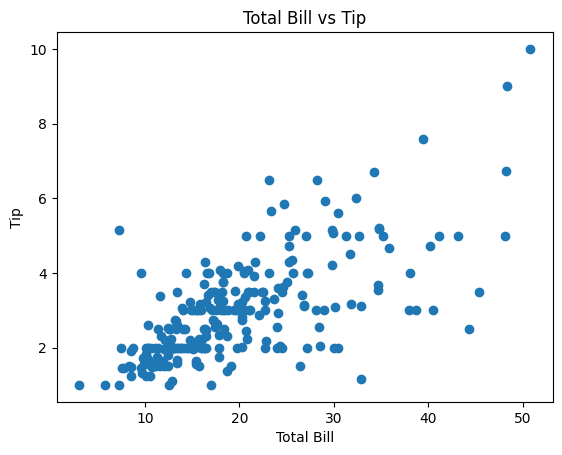

In [ ]:
#Before using any model, we must confirm relationship..?
import matplotlib.pyplot as plt
plt.scatter(df["total_bill"],df["tip"])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")
plt.show()

In [6]:
"""
Observations:
1.As the bill increases tip increases.
2.Relationship = Straight line ( we can use Linear Relationship). 
"""

'\nObservations:\n1.As the bill increases tip increases.\n2.Relationship = Straight line ( we can use Linear Relationship). \n'

# 5. Feature & Target Separation

In [7]:
x=df[["total_bill"]] #Feature i/p 2d only
y=df["tip"]          #Target o/p 1d only 

# 6.Train-Test Split

In [9]:
#A model must perform well on unseen data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 7.Feature Standardization

In [11]:
"""
1.Compare the co-efficients fairly.
2.Avoid the dominance of large values.
3.Prepare for Ridge/Lasso. 
"""
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
# IMP: 
# 1.Fit only on training data.
# 2.Prevents the data leakage.

# 8. Train Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)
print("Co-efficient(m) : ",model.coef_[0])
print("Intercept (c)   : ",model.intercept_)
y_pred=model.predict(x_test_scaled)

Co-efficient(m) :  0.9357171400271826
Intercept (c)   :  3.0877948717948724


# 9. Model Evaluation 

In [17]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
r2=r2_score(y_test,y_pred)
print("R2 Score : ",r2)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error : ",mse)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error : ",mae)
rmse = np.sqrt(mse)
print("Root Mean Squared Error : ",rmse)

R2 Score :  0.5449381659234664
Mean Squared Error :  0.5688142529229538
Mean Absolute Error :  0.6208580000398983
Root Mean Squared Error :  0.7541977545199626


# 10. Visualize the Best Fit Line

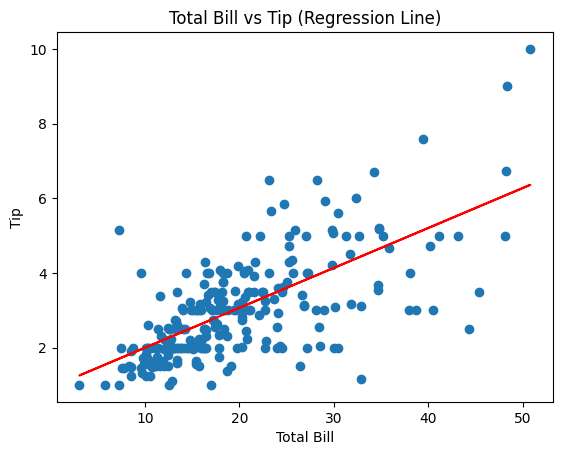

In [18]:
plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color='red')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip (Regression Line)")
plt.show()

# 11. Prediction(Input - Output Real Time)

In [23]:
bill_amount=float(input("Enter the Bill Amount : "))
scaled_bill_amount=scaler.transform([[bill_amount]])
tip_amount=model.predict(scaled_bill_amount)
print("Predicted Tip Amount : Rs.",tip_amount[0].round(2))

Predicted Tip Amount : Rs. 11.62


C:\Users\srira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
